In [2]:
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture



In [3]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [4]:
### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

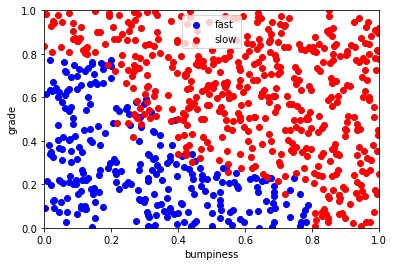

In [5]:
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

In [15]:
###############################################################################
### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from time import time

In [22]:
ests = [5,10,50,100,1000,10000]
l_rates = [.1,.5,1,2,10]
results =[]
t_0 = time()
for l_rate in l_rates:
    for est in ests:
        clf = AdaBoostClassifier(n_estimators=est,learning_rate=l_rate)#, random_state=0)
        t0 = time()
        clf.fit(features_train, labels_train)
        time_to_run = round(time()-t0,3)
        print("Time to train with {} estimators is with learning rate {}".format(est,l_rate),time_to_run)
        pred = clf.predict(features_test)
        acc_s = accuracy_score(pred,labels_test)
        print("accuracy score is :",round(acc_s,3))
        result = [l_rate, est, time_to_run, acc_s]
        results.append(result)
print("Time to run all is ", round(time()-t_0,3))

Time to train with 5 estimators is with learning rate 0.1 0.023
accuracy score is : 0.804
Time to train with 10 estimators is with learning rate 0.1 0.042
accuracy score is : 0.808
Time to train with 50 estimators is with learning rate 0.1 0.106
accuracy score is : 0.916
Time to train with 100 estimators is with learning rate 0.1 0.209
accuracy score is : 0.92
Time to train with 1000 estimators is with learning rate 0.1 1.962
accuracy score is : 0.916
Time to train with 10000 estimators is with learning rate 0.1 18.09
accuracy score is : 0.912
Time to train with 5 estimators is with learning rate 0.5 0.009
accuracy score is : 0.892
Time to train with 10 estimators is with learning rate 0.5 0.017
accuracy score is : 0.924
Time to train with 50 estimators is with learning rate 0.5 0.083
accuracy score is : 0.924
Time to train with 100 estimators is with learning rate 0.5 0.187
accuracy score is : 0.916
Time to train with 1000 estimators is with learning rate 0.5 1.672
accuracy score is :

In [23]:
results

[[0.1, 5, 0.023, 0.804],
 [0.1, 10, 0.042, 0.808],
 [0.1, 50, 0.106, 0.916],
 [0.1, 100, 0.209, 0.92],
 [0.1, 1000, 1.962, 0.916],
 [0.1, 10000, 18.09, 0.912],
 [0.5, 5, 0.009, 0.892],
 [0.5, 10, 0.017, 0.924],
 [0.5, 50, 0.083, 0.924],
 [0.5, 100, 0.187, 0.916],
 [0.5, 1000, 1.672, 0.904],
 [0.5, 10000, 16.69, 0.912],
 [1, 5, 0.01, 0.88],
 [1, 10, 0.018, 0.916],
 [1, 50, 0.083, 0.924],
 [1, 100, 0.19, 0.924],
 [1, 1000, 1.714, 0.916],
 [1, 10000, 16.582, 0.92],
 [2, 5, 0.01, 0.776],
 [2, 10, 0.018, 0.808],
 [2, 50, 0.084, 0.92],
 [2, 100, 0.191, 0.904],
 [2, 1000, 1.652, 0.912],
 [2, 10000, 16.478, 0.916],
 [10, 5, 0.01, 0.664],
 [10, 10, 0.016, 0.8],
 [10, 50, 0.077, 0.8],
 [10, 100, 0.174, 0.8],
 [10, 1000, 1.506, 0.8],
 [10, 10000, 14.669, 0.8]]

Time to train with 10000 estimators is with learning rate 10 0.053
accuracy score is : 0.924


/mnt/My_Drive/my_drive/MachineLearning_Udacity/ud120-projects/choose_your_own/class_vis.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


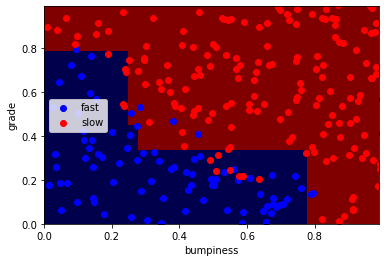

In [24]:
#fastest and most accurate was 10 estimator and learning rates (.5), I'll hard code it
clf = AdaBoostClassifier(n_estimators=10,learning_rate=.5)#, random_state=0)
t0 = time()
clf.fit(features_train, labels_train)
print("Time to train with {} estimators is with learning rate {}".format(est,l_rate),round(time()-t0,3))
pred = clf.predict(features_test)
acc_s = accuracy_score(pred,labels_test)
print("accuracy score is :",round(acc_s,3))
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass


Time to train with 10000 estimators is with learning rate 10 0.01
accuracy score is : 0.8


/mnt/My_Drive/my_drive/MachineLearning_Udacity/ud120-projects/choose_your_own/class_vis.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


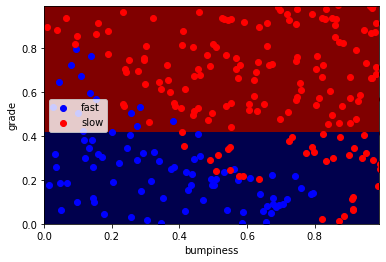

In [26]:
clf = AdaBoostClassifier(n_estimators=2,learning_rate=10)#, random_state=0)
t0 = time()
clf.fit(features_train, labels_train)
print("Time to train with {} estimators is with learning rate {}".format(est,l_rate),round(time()-t0,3))
pred = clf.predict(features_test)
acc_s = accuracy_score(pred,labels_test)
print("accuracy score is :",round(acc_s,3))
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass


accuracy score is : 0.924


/mnt/My_Drive/my_drive/MachineLearning_Udacity/ud120-projects/choose_your_own/class_vis.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


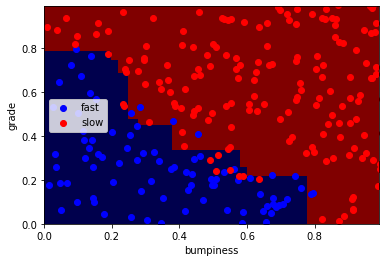

In [29]:
clf = AdaBoostClassifier(n_estimators=50,learning_rate=.5)#, random_state=0)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
acc_s = accuracy_score(pred,labels_test)
print("accuracy score is :",round(acc_s,3))
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass


accuracy score is : 0.916


/mnt/My_Drive/my_drive/MachineLearning_Udacity/ud120-projects/choose_your_own/class_vis.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


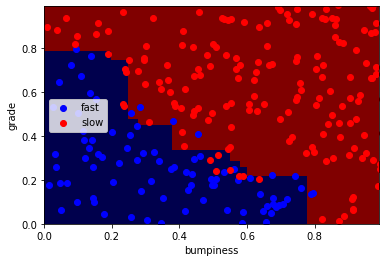

In [30]:
clf = AdaBoostClassifier(n_estimators=100,learning_rate=.5)#, random_state=0)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
acc_s = accuracy_score(pred,labels_test)
print("accuracy score is :",round(acc_s,3))
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

accuracy score is : 0.924


/mnt/My_Drive/my_drive/MachineLearning_Udacity/ud120-projects/choose_your_own/class_vis.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


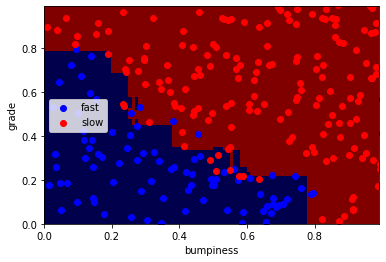

In [31]:
clf = AdaBoostClassifier(n_estimators=100,learning_rate=1)#, random_state=0)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
acc_s = accuracy_score(pred,labels_test)
print("accuracy score is :",round(acc_s,3))
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

accuracy score is : 0.924


/mnt/My_Drive/my_drive/MachineLearning_Udacity/ud120-projects/choose_your_own/class_vis.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


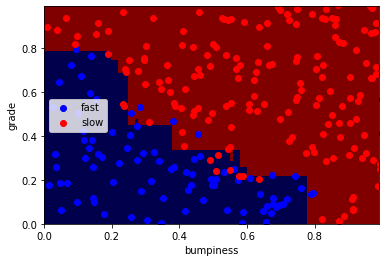

In [32]:
clf = AdaBoostClassifier(n_estimators=50,learning_rate=1)#, random_state=0)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
acc_s = accuracy_score(pred,labels_test)
print("accuracy score is :",round(acc_s,3))
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass